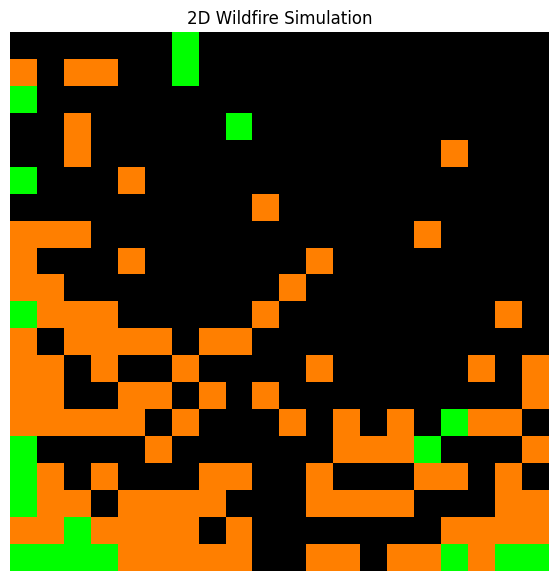

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Define grid size
GRID_SIZE = (20, 20)

# Initialize fuel types (0=Grass, 1=Shrubs, 2=Trees, 3=Buildings)
fuel_types = np.random.choice([0, 1, 2, 3], size=GRID_SIZE, p=[0.4, 0.3, 0.2, 0.1])

# Define fire states
UNBURNED, BURNING, BURNED, FIREBREAK = 0, 1, 2, 3
fire_state = np.zeros(GRID_SIZE, dtype=int)  # Start with all cells unburned

# Ignite a fire at a random location
fire_x, fire_y = np.random.randint(0, GRID_SIZE[0]), np.random.randint(0, GRID_SIZE[1])
fire_state[fire_x, fire_y] = BURNING

# Transition probabilities based on fuel type
fire_spread_probs = {  # Probability of catching fire based on fuel type
    0: 0.3,  # Grass
    1: 0.5,  # Shrubs
    2: 0.7,  # Trees
    3: 0.1   # Buildings (low probability)
}

fire_extinguish_prob = 0.2  # Probability that a burning cell extinguishes

# Store fire spread history for animation
fire_state_history = []

# Run fire spread simulation for multiple steps
for step in range(20):
    new_fire_state = fire_state.copy()

    for x in range(GRID_SIZE[0]):
        for y in range(GRID_SIZE[1]):
            if fire_state[x, y] == BURNING:  # Burning cell
                for dx, dy in [(-1,0), (1,0), (0,-1), (0,1), (-1,-1), (-1,1), (1,-1), (1,1)]:
                    nx, ny = x + dx, y + dy
                    if 0 <= nx < GRID_SIZE[0] and 0 <= ny < GRID_SIZE[1]:  # Stay within bounds
                        if fire_state[nx, ny] == UNBURNED:  # If neighbor is unburned
                            spread_prob = fire_spread_probs[fuel_types[nx, ny]]
                            if np.random.rand() < spread_prob:
                                new_fire_state[nx, ny] = BURNING  # Fire spreads
                
                # Probability of fire extinguishing
                if np.random.rand() < fire_extinguish_prob:
                    new_fire_state[x, y] = BURNED  # Mark as burned

    fire_state = new_fire_state.copy()
    fire_state_history.append(fire_state.copy())

# Visualization of fire spread in 2D
def plot_fire_state(fire_state):
    color_map = {UNBURNED: 0, BURNING: 1, BURNED: 2, FIREBREAK: 3}
    fire_colored_grid = np.zeros((*GRID_SIZE, 3))  # RGB representation
    
    fire_colored_grid[fire_state == UNBURNED] = [0.0, 1.0, 0.0]  # Green
    fire_colored_grid[fire_state == BURNING] = [1.0, 0.5, 0.0]  # Orange
    fire_colored_grid[fire_state == BURNED] = [0.0, 0.0, 0.0]  # Black
    fire_colored_grid[fire_state == FIREBREAK] = [0.0, 0.0, 1.0]  # Blue
    
    plt.figure(figsize=(7, 7))
    plt.imshow(fire_colored_grid, interpolation='nearest')
    plt.title("2D Wildfire Simulation")
    plt.axis("off")
    plt.show()

# Display fire spread step by step
for step in range(len(fire_state_history)):
    clear_output(wait=True)
    plot_fire_state(fire_state_history[step])
    plt.pause(0.5)  # Pause for animation effect

plt.show()  # Final frame display
